### **Chuẩn bị các thư viện**

In [336]:
# Import thuật toán Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

# Import thư viện đánh giá
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_fscore_support, r2_score
)

# Import mã hóa và chuẩn hóa dữ liệu
from sklearn.preprocessing import (
    LabelEncoder, OneHotEncoder, LabelBinarizer,
    StandardScaler, MinMaxScaler, MaxAbsScaler
)

# Import chia tập dữ liệu
from sklearn.model_selection import train_test_split

# Import thư viện hỗ trợ khác
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy.stats as stats
import pickle


### Quy Trình Chuẩn:

**Bước 1. Cắt dữ liệu thành 2 tập:**

* Target (Mục tiêu): Đây là cột nhãn hoặc kết quả mà mô hình cần dự đoán (ví dụ: Purchased trong dataset Social_Network_Ads).
* Features (Đặc trưng): Đây là các biến số đầu vào dùng để dự đoán target (ví dụ: Gender, Age, EstimatedSalary).

**Bước 2. Mã hóa dữ liệu (nếu cần):** Chuyển đổi các cột categorical (phân loại) thành dạng số bằng LabelEncoder hoặc OneHotEncoder.

**Bước 3. Chuẩn hóa dữ liệu:** Sử dụng StandardScaler hoặc MinMaxScaler để đảm bảo dữ liệu có cùng phân phối và giảm ảnh hưởng của các đơn vị đo khác nhau.


**Bước 4 Chia dữ liệu thành train và test:** Sử dụng train_test_split() để chia dữ liệu thành tập huấn luyện và kiểm tra, thường theo tỉ lệ 80% train và 20% test.

In [337]:
# 1. Đọc dữ liệu từ CSV
data = pd.read_csv('data/Social_Network_Ads.csv')

# 2. Tách Features và Target
X = data[['Gender', 'Age', 'EstimatedSalary']].copy()  # Bản sao an toàn của Features
y = data['Purchased'].copy()  # Bản sao an toàn của Target

# 3. Mã hóa cột 'Gender' 
X.loc[:, 'Gender'] = LabelEncoder().fit_transform(X['Gender'])

# 4. Chuẩn hóa dữ liệu số với StandardScaler
scaler = StandardScaler()
X[['Age', 'EstimatedSalary']] = scaler.fit_transform(X[['Age', 'EstimatedSalary']])

# 5. Chia dữ liệu thành train và test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Hiển thị kết quả
print("X_train:\n", X_train.head())
print("\ny_train:\n", y_train.head())
print("\nX_test:\n", X_test.head())
print("\ny_test:\n", y_test.head())
data

X_train:
     Gender       Age  EstimatedSalary
3        0 -1.017692        -0.374182
18       1  0.797057        -1.225763
202      0  0.128465         1.886912
250      0  0.606031        -0.902749
274      0  1.847701        -1.284492

y_train:
 3      0
18     1
202    1
250    0
274    1
Name: Purchased, dtype: int64

X_test:
     Gender       Age  EstimatedSalary
209      0  0.797057        -1.401952
280      0  2.038728         0.536129
33       0 -0.922179        -0.755925
210      0  0.988083         0.771048
93       0 -0.826666        -1.225763

y_test:
 209    0
280    1
33     0
210    1
93     0
Name: Purchased, dtype: int64


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### **Thuật toán KNN**

In [338]:
# 1. Khởi tạo KNN với số láng giềng k = 5
knn = KNeighborsClassifier(n_neighbors=5)

# 2. Huấn luyện mô hình trên tập train
knn.fit(X_train, y_train)

# 3. Dự đoán trên tập test
y_pred_knn = knn.predict(X_test)

# 4. Tính toán các chỉ số từ kết quả dự đoán
accuracy = accuracy_score(y_test, y_pred_knn)
cm = confusion_matrix(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn)

# 5. In kết quả với định dạng rõ ràng
print("\n=== KNN - Kết Quả Đánh Giá ===")
print(f"Độ chính xác (Accuracy): {accuracy:.2%}")

print("\n=== Báo Cáo Phân Loại (Classification Report) ===")
print(report)

# 6. Định nghĩa các chỉ số chi tiết từ ma trận nhầm lẫn
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# 7. In các chỉ số chi tiết
print("\n=== Chỉ Số Đánh Giá Chi Tiết ===")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")



=== KNN - Kết Quả Đánh Giá ===
Độ chính xác (Accuracy): 92.50%

=== Báo Cáo Phân Loại (Classification Report) ===
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80


=== Chỉ Số Đánh Giá Chi Tiết ===
Precision: 0.87
Recall (Sensitivity): 0.93
F1-Score: 0.90


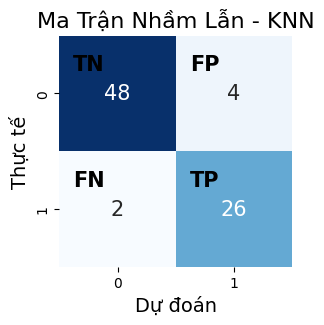


=== Ma Trận Nhầm Lẫn (Confusion Matrix) ===
True Negative (TN)  : 48 (Dự đoán đúng - Không Mua)
False Positive (FP) : 4 (Dự đoán sai - Không Mua thành Có Mua)
False Negative (FN) : 2 (Dự đoán sai - Có Mua thành Không Mua)
True Positive (TP)  : 26 (Dự đoán đúng - Có Mua)


In [339]:
# 1. Dự đoán với KNN và tạo ma trận nhầm lẫn
y_pred_knn = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)

# 2. Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(3, 3))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 15})

# 3. Thêm chú thích TN, FP, FN, TP
ax.text(0.25, 0.25, "TN", ha='center', va='center', color='black', fontsize=15, weight='bold')
ax.text(1.25, 0.25, "FP", ha='center', va='center', color='black', fontsize=15, weight='bold')
ax.text(0.25, 1.25, "FN", ha='center', va='center', color='black', fontsize=15, weight='bold')
ax.text(1.25, 1.25, "TP", ha='center', va='center', color='black', fontsize=15, weight='bold')

# 4. Thiết lập nhãn và tiêu đề biểu đồ
plt.xlabel('Dự đoán', fontsize=14)
plt.ylabel('Thực tế', fontsize=14)
plt.title('Ma Trận Nhầm Lẫn - KNN', fontsize=16)

# 5. Hiển thị biểu đồ
plt.show()

# 6. Giải thích rõ từng phần của ma trận nhầm lẫn
print("\n=== Ma Trận Nhầm Lẫn (Confusion Matrix) ===")
print(f"True Negative (TN)  : {cm[0, 0]} (Dự đoán đúng - Không Mua)")
print(f"False Positive (FP) : {cm[0, 1]} (Dự đoán sai - Không Mua thành Có Mua)")
print(f"False Negative (FN) : {cm[1, 0]} (Dự đoán sai - Có Mua thành Không Mua)")
print(f"True Positive (TP)  : {cm[1, 1]} (Dự đoán đúng - Có Mua)")


### **Thuật toán Decision Tree**

In [340]:
# 1. Khởi tạo Decision Tree với entropy và độ sâu tối đa là 3
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# 2. Huấn luyện mô hình trên tập train
dt.fit(X_train, y_train)

# 3. Dự đoán trên tập test
y_pred_dt = dt.predict(X_test)

# 4. Tính toán các chỉ số từ kết quả dự đoán
accuracy = accuracy_score(y_test, y_pred_dt)
cm = confusion_matrix(y_test, y_pred_dt)
report = classification_report(y_test, y_pred_dt)

# 5. In kết quả với định dạng rõ ràng
print("\n=== Decision Tree - Kết Quả Đánh Giá ===")
print(f"Độ chính xác (Accuracy): {accuracy:.2%}")

print("\n=== Báo Cáo Phân Loại (Classification Report) ===")
print(report)

# 6. Định nghĩa các chỉ số chi tiết từ ma trận nhầm lẫn
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# 7. In các chỉ số chi tiết
print("\n=== Chỉ Số Đánh Giá Chi Tiết ===")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")



=== Decision Tree - Kết Quả Đánh Giá ===
Độ chính xác (Accuracy): 91.25%

=== Báo Cáo Phân Loại (Classification Report) ===
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80


=== Chỉ Số Đánh Giá Chi Tiết ===
Precision: 0.84
Recall (Sensitivity): 0.93
F1-Score: 0.88


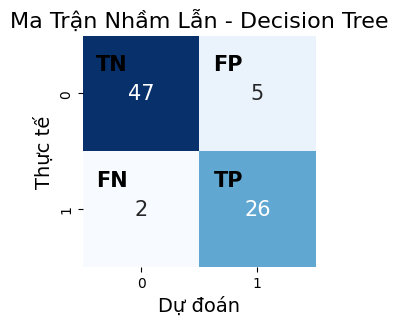


=== Ma Trận Nhầm Lẫn (Confusion Matrix) ===
True Negative (TN)  : 47 (Dự đoán đúng - Không Mua)
False Positive (FP) : 5 (Dự đoán sai - Không Mua thành Có Mua)
False Negative (FN) : 2 (Dự đoán sai - Có Mua thành Không Mua)
True Positive (TP)  : 26 (Dự đoán đúng - Có Mua)


In [341]:
# 1. Khởi tạo Decision Tree với tiêu chí 'entropy' và độ sâu tối đa là 3
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# 2. Huấn luyện mô hình trên tập train
dt.fit(X_train, y_train)

# 3. Dự đoán trên tập test và tạo ma trận nhầm lẫn
y_pred_dt = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)

# 4. Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(3, 3))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 15})

# 5. Thêm chú thích TN, FP, FN, TP vào biểu đồ
ax.text(0.25, 0.25, "TN", ha='center', va='center', color='black', fontsize=15, weight='bold')
ax.text(1.25, 0.25, "FP", ha='center', va='center', color='black', fontsize=15, weight='bold')
ax.text(0.25, 1.25, "FN", ha='center', va='center', color='black', fontsize=15, weight='bold')
ax.text(1.25, 1.25, "TP", ha='center', va='center', color='black', fontsize=15, weight='bold')

# 6. Thiết lập nhãn và tiêu đề biểu đồ
plt.xlabel('Dự đoán', fontsize=14)
plt.ylabel('Thực tế', fontsize=14)
plt.title('Ma Trận Nhầm Lẫn - Decision Tree', fontsize=16)

# 7. Hiển thị biểu đồ
plt.show()

# 8. Giải thích rõ từng phần của ma trận nhầm lẫn
print("\n=== Ma Trận Nhầm Lẫn (Confusion Matrix) ===")
print(f"True Negative (TN)  : {cm[0, 0]} (Dự đoán đúng - Không Mua)")
print(f"False Positive (FP) : {cm[0, 1]} (Dự đoán sai - Không Mua thành Có Mua)")
print(f"False Negative (FN) : {cm[1, 0]} (Dự đoán sai - Có Mua thành Không Mua)")
print(f"True Positive (TP)  : {cm[1, 1]} (Dự đoán đúng - Có Mua)")

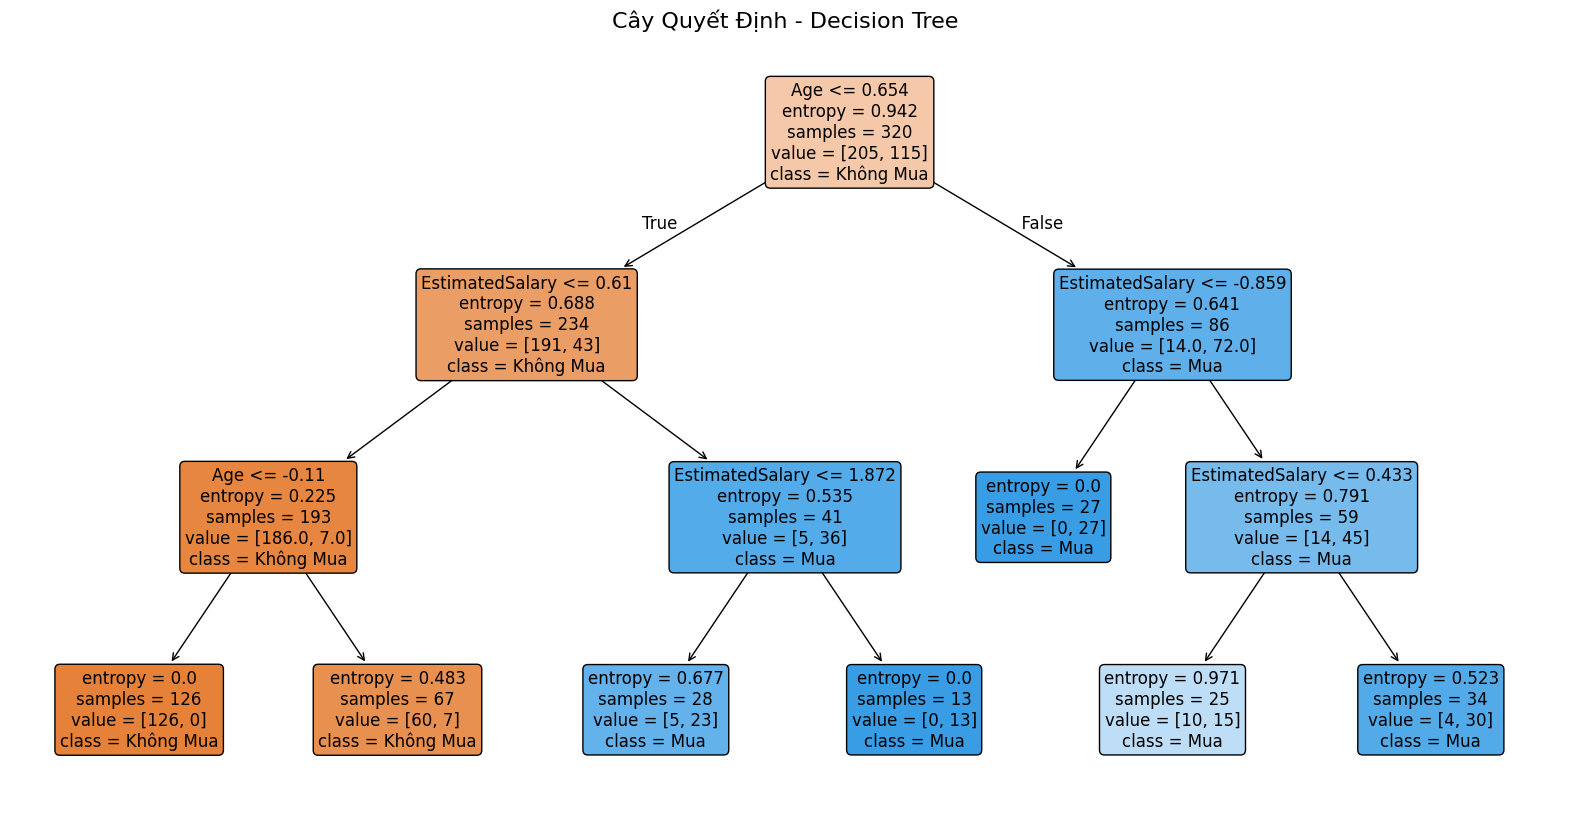

In [342]:
# 1. Khởi tạo Decision Tree với tiêu chí 'entropy' và độ sâu tối đa là 3
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# 2. Huấn luyện cây quyết định trên tập train
dt.fit(X_train, y_train)

# 3. Vẽ cây quyết định
plt.figure(figsize=(20, 10))  # Thiết lập kích thước của biểu đồ
plot_tree(
    dt, 
    feature_names=['Gender', 'Age', 'EstimatedSalary'],  # Tên các feature
    class_names=['Không Mua', 'Mua'],  # Tên các lớp
    filled=True,  # Tô màu các nhánh để dễ phân biệt
    rounded=True,  # Bo tròn các ô nhánh
    fontsize=12  # Kích thước chữ
)

# 4. Hiển thị biểu đồ
plt.title('Cây Quyết Định - Decision Tree', fontsize=16)
plt.show()

### **Thuật toán Naive Bayes**

In [343]:
# 1. Khởi tạo Naive Bayes (GaussianNB dùng cho dữ liệu phân phối chuẩn)
nb = GaussianNB()

# 2. Huấn luyện mô hình trên tập train
nb.fit(X_train, y_train)

# 3. Dự đoán trên tập test
y_pred_nb = nb.predict(X_test)

# 4. Tính toán và in kết quả
accuracy = accuracy_score(y_test, y_pred_nb)
cm = confusion_matrix(y_test, y_pred_nb)
report = classification_report(y_test, y_pred_nb)

# 5. In kết quả với định dạng rõ ràng
print("\n=== Naive Bayes - Kết Quả Đánh Giá ===")
print(f"Độ chính xác (Accuracy): {accuracy:.2%}")

print("\n=== Báo Cáo Phân Loại (Classification Report) ===")
print(report)

# 6. Tính Precision, Recall và F1-Score từ Ma Trận Nhầm Lẫn
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# 7. In Chỉ Số Chi Tiết
print("\n=== Chỉ Số Đánh Giá Chi Tiết ===")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


=== Naive Bayes - Kết Quả Đánh Giá ===
Độ chính xác (Accuracy): 93.75%

=== Báo Cáo Phân Loại (Classification Report) ===
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80


=== Chỉ Số Đánh Giá Chi Tiết ===
Precision: 0.93
Recall (Sensitivity): 0.89
F1-Score: 0.91


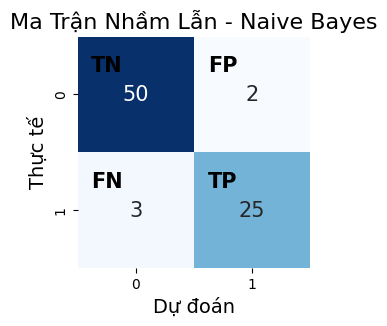

In [344]:
# 1. Dự đoán với Naive Bayes và tạo ma trận nhầm lẫn
y_pred_nb = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred_nb)

# 2. Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(3, 3))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 15})

# 3. Thêm chú thích TN, FP, FN, TP vào biểu đồ
ax.text(0.25, 0.25, "TN", ha='center', va='center', color='black', fontsize=15, weight='bold')
ax.text(1.25, 0.25, "FP", ha='center', va='center', color='black', fontsize=15, weight='bold')
ax.text(0.25, 1.25, "FN", ha='center', va='center', color='black', fontsize=15, weight='bold')
ax.text(1.25, 1.25, "TP", ha='center', va='center', color='black', fontsize=15, weight='bold')

# 4. Thiết lập nhãn và tiêu đề biểu đồ
plt.xlabel('Dự đoán', fontsize=14)
plt.ylabel('Thực tế', fontsize=14)
plt.title('Ma Trận Nhầm Lẫn - Naive Bayes', fontsize=16)

# 5. Hiển thị biểu đồ
plt.show()

### **Thuật Toán Linear Reqression**


=== Linear Regression - Kết Quả ===
Mean Squared Error (MSE): 0.10
R-squared (R²): 0.56


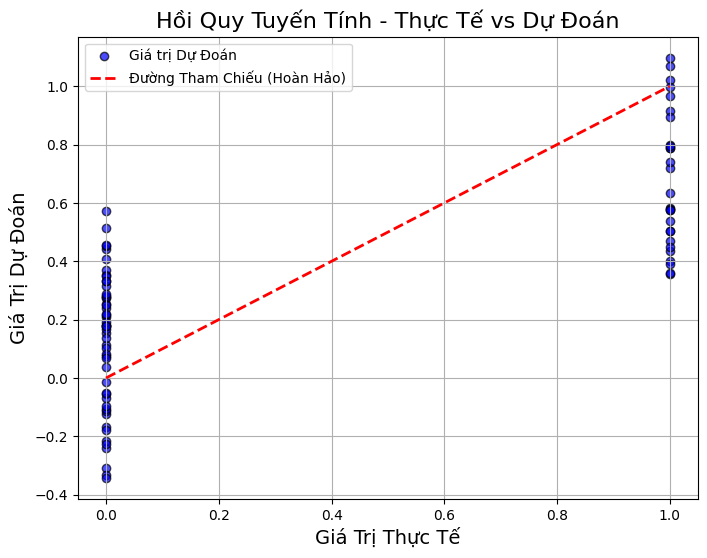

In [345]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Khởi tạo mô hình Linear Regression
lr = LinearRegression()

# 2. Huấn luyện mô hình trên tập train
lr.fit(X_train, y_train)

# 3. Dự đoán trên tập test
y_pred_lr = lr.predict(X_test)

# 4. Tính toán các chỉ số đánh giá mô hình
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

# 5. In ra kết quả đánh giá
print("\n=== Linear Regression - Kết Quả ===")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# 6. Vẽ biểu đồ thực tế vs dự đoán
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Giá trị Dự Đoán', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Đường Tham Chiếu (Hoàn Hảo)')
plt.xlabel('Giá Trị Thực Tế', fontsize=14)
plt.ylabel('Giá Trị Dự Đoán', fontsize=14)
plt.title('Hồi Quy Tuyến Tính - Thực Tế vs Dự Đoán', fontsize=16)
plt.legend(loc='upper left')  # Thêm chú thích
plt.grid(True)  # Thêm lưới cho dễ nhìn
plt.show()
